<a href="https://colab.research.google.com/github/LucasWerppFranco/CP-1---Energias-Renovaveis/blob/main/Exerc%C3%ADcios/1CCPF_CP1_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando Bibliotecas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Criando Dataset c/ base no arquivo .txt externo**

In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt',
                 sep=';',
                 na_values='?')

**Análise Exploratória**

In [ ]:
df.head(11)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


**Analisando Características do Dataset**

In [ ]:
# Categorias da Tabela
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
# Tamanho do Dataset
df.shape
print(f"O Data frame possuí {df.shape[0]} linhas e {df.shape[1]} colunas")

O Data frame possuí 2075259 linhas e 9 colunas


In [ ]:
# Características dos Atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [ ]:
# Descrição Estátistica das Colunas
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


**Formatando Dataset**

In [ ]:
# Converter as colunas numéricas que estão como object
cols_to_convert = ['Global_active_power', 'Global_reactive_power',
                   'Voltage', 'Global_intensity',
                   'Sub_metering_1', 'Sub_metering_2']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

**Exercícios Checkpoint**

**PARTE 1 – Exercícios iniciais com Individual Household Electric Power Consumption**

Ex. 1: Carregue o dataset e exiba as 10 primeiras linhas.

In [ ]:
df.head(11)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


Ex. 2: Diferença entre as variáveis GAP e GRP

Global Active Power x Global Reactive Power.

A principal diferença entre potência ativa e reativa reside no fato de que a **potência ativa (P)** é a potência que realiza trabalho útil, convertendo energia elétrica em outras formas, como mecânica, térmica ou luminosa, enquanto a **potência reativa (Q)** é a potência necessária para manter campos eletromagnéticos em dispositivos como motores e transformadores, mas não realiza trabalho útil diretamente

Ex. 3: Verifique se existem valores ausentes no dataset. Quantifique-os.

In [ ]:
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


Ex. 4: Converta a coluna "Date" para o tipo "datetime" e crie uma nova coluna com o dia da semana correspondente.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Day of Week'] = df['Date'].dt.day_name()
display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day of Week
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday


*Ex*. 5: Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de "Global_active_power".

In [ ]:
# Garantir conversão da coluna Date
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Converter Global_active_power para numérico
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Filtrar registros de 2007
df_2007 = df[df['Date'].dt.year == 2007]

# Calcular média diária
daily_mean_2007 = df_2007.groupby('Date')['Global_active_power'].mean()

print("Média diária de Global_active_power em 2007 (primeiros 5 dias):")
print(daily_mean_2007.head())


Média diária de Global_active_power em 2007 (primeiros 5 dias):
Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: Global_active_power, dtype: float64


Ex. 6: Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua
escolha.

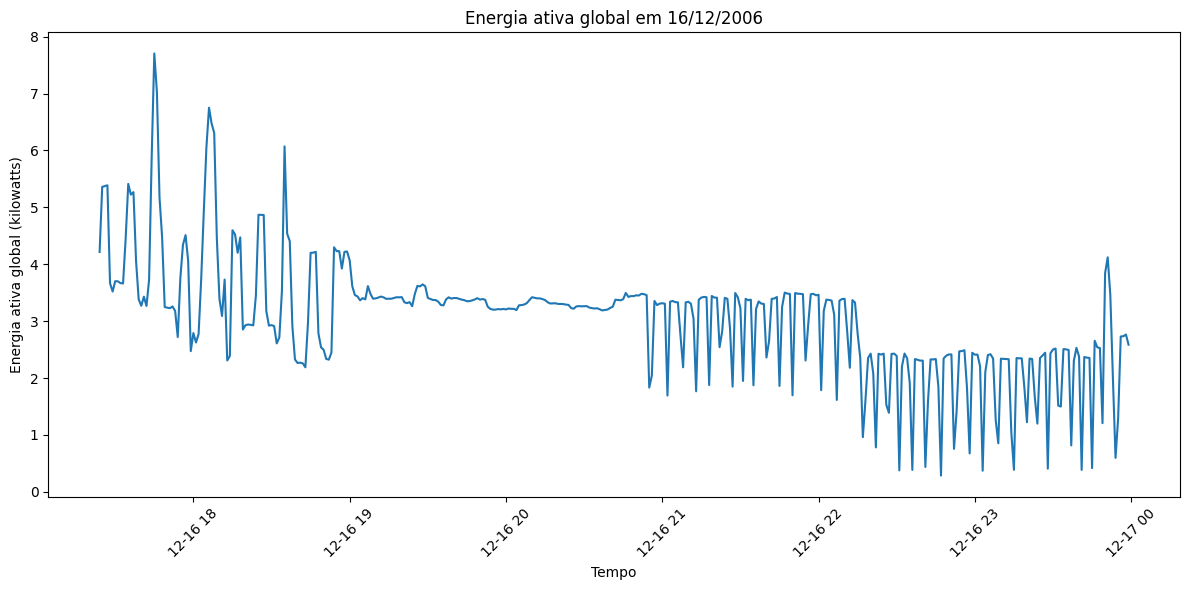

In [ ]:
date_to_plot = df['Date'].iloc[0]

df_single_day = df[df['Date'] == date_to_plot].copy()

df_single_day['datetime'] = pd.to_datetime(df_single_day['Date'].astype(str) + ' ' + df_single_day['Time'], format='%Y-%m-%d %H:%M:%S')


df_single_day.set_index('datetime', inplace=True)

df_single_day['Global_active_power'] = pd.to_numeric(df_single_day['Global_active_power'], errors='coerce')
df_single_day.dropna(subset=['Global_active_power'], inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_single_day.index, y='Global_active_power', data=df_single_day)
plt.title(f'Energia ativa global em {date_to_plot.strftime("%d/%m/%Y")}')
plt.xlabel('Tempo')
plt.ylabel('Energia ativa global (kilowatts)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ex. 7: Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?


<Axes: >

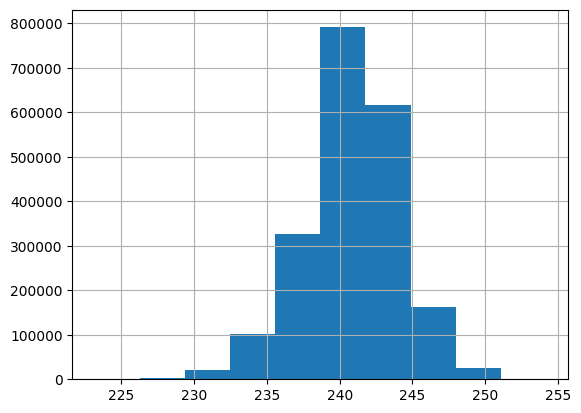

In [ ]:
df["Voltage"].hist()

Ex. 8: Calcule o consumo médio por mês em todo o período disponível no dataset.


In [ ]:
media=df["Global_active_power"].mean()
print(f"O consumo medio por mes é de {media:.2f} ")

O consumo medio por mes é de 1.09 


Ex. 9:  Identifique o dia com maior consumo de energia ativa global (Global_active_power).


In [ ]:
consumo_diario = df.groupby('Date')['Global_active_power'].sum()

dia_maior_consumo = consumo_diario.idxmax()
valor_maior_consumo = consumo_diario.max()

print(f"O dia com maior consumo de energia ativa global é {dia_maior_consumo} com um total de {valor_maior_consumo} kW.")

O dia com maior consumo de energia ativa global é 2006-12-23 00:00:00 com um total de 4773.386 kW.


Ex. 10: Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.


In [ ]:
df['Day_of_week'] = df['Date'].dt.dayofweek

df['Day_type'] = df['Day_of_week'].apply(lambda x: 'dias da semana' if x < 5 else 'finais de semana')

average_consumption_by_day_type = df.groupby('Day_type')['Global_active_power'].mean()

print("Consumo médio de energia ativa global:")
print(average_consumption_by_day_type)

Consumo médio de energia ativa global:
Day_type
dias da semana      1.035472
finais de semana    1.234232
Name: Global_active_power, dtype: float64


Ex. 11: Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [ ]:
# Lista de colunas
Global_colunas = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Seleciona as colunas e calcula a correlação
correlacao = df[Global_colunas].corr()
print('a correlação das variáveis é: ')
print(correlacao)


a correlação das variáveis é: 
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


Ex. 12: Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.

In [ ]:
# Criando a variável Total_Sub_metering:
Total_Sub_metering = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
print('A soma da nova variável é de: ')
print(Total_Sub_metering)

A soma da nova variável é de: 
0          18.0
1          17.0
2          19.0
3          18.0
4          18.0
           ... 
2075254     0.0
2075255     0.0
2075256     0.0
2075257     0.0
2075258     0.0
Length: 2075259, dtype: float64


Ex. 13: Verifique se há algum mês em que o Total_Sub_metering ultrapassa a média de Global_active_power.

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')

#Criando a coluna Total_Sub_metering
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

monthly_sub_metering = df.groupby('Month')['Total_Sub_metering'].sum()
monthly_global_active_power = df.groupby('Month')['Global_active_power'].mean()

comparacao = monthly_sub_metering > monthly_global_active_power

print("Meses onde Total_Sub_metering ultrapassa a média de Global_active_power:")
print(comparacao[comparacao])

Meses onde Total_Sub_metering ultrapassa a média de Global_active_power:
Month
2006-12    True
2007-01    True
2007-02    True
2007-03    True
2007-04    True
2007-05    True
2007-06    True
2007-07    True
2007-08    True
2007-09    True
2007-10    True
2007-11    True
2007-12    True
2008-01    True
2008-02    True
2008-03    True
2008-04    True
2008-05    True
2008-06    True
2008-07    True
2008-08    True
2008-09    True
2008-10    True
2008-11    True
2008-12    True
2009-01    True
2009-02    True
2009-03    True
2009-04    True
2009-05    True
2009-06    True
2009-07    True
2009-08    True
2009-09    True
2009-10    True
2009-11    True
2009-12    True
2010-01    True
2010-02    True
2010-03    True
2010-04    True
2010-05    True
2010-06    True
2010-07    True
2010-08    True
2010-09    True
2010-10    True
2010-11    True
Freq: M, dtype: bool


Ex. 14: Faça um gráfico de série temporal do Voltage para o ano de 2008:

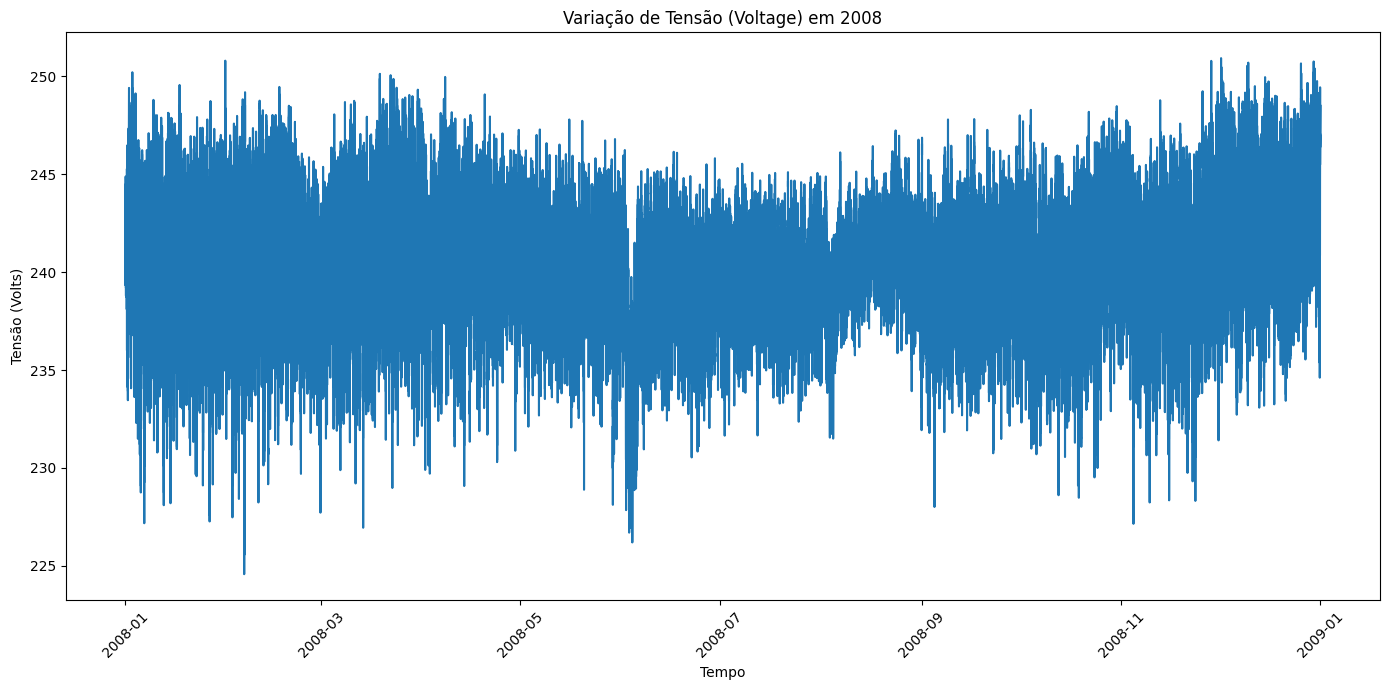

In [ ]:
# Filter data for the year 2008
df_2008 = df[df['Date'].dt.year == 2008].copy()

# Combine 'Date' and 'Time' columns into a datetime index
df_2008['datetime'] = pd.to_datetime(df_2008['Date'].astype(str) + ' ' + df_2008['Time'], format='%Y-%m-%d %H:%M:%S')
df_2008.set_index('datetime', inplace=True)

# Ensure 'Voltage' is numeric and drop missing values for plotting
df_2008['Voltage'] = pd.to_numeric(df_2008['Voltage'], errors='coerce')
df_2008.dropna(subset=['Voltage'], inplace=True)

# Create the time series plot
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_2008.index, y='Voltage', data=df_2008)
plt.title('Variação de Tensão (Voltage) em 2008')
plt.xlabel('Tempo')
plt.ylabel('Tensão (Volts)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ex. 15: Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

In [ ]:
# Define os meses de verão e inverno (Hemisfério Norte)
meses_de_verao = [6, 7, 8]
meses_de_inverno = [12, 1, 2]

# Filtra os dados para os meses de verão e inverno
df_verao = df[df['Date'].dt.month.isin(meses_de_verao)]
df_inverno = df[df['Date'].dt.month.isin(meses_de_inverno)]

# Calcula a média de Global_active_power para verão e inverno
media_do_verao = df_verao['Global_active_power'].mean()
media_do_inverno = df_inverno['Global_active_power'].mean()

print(f"Consumo médio de Global_active_power no verão (Hemisfério Norte): {media_do_verao:.2f} kW")
print(f"Consumo médio de Global_active_power no inverno (Hemisfério Norte): {media_do_inverno:.2f} kW")

Consumo médio de Global_active_power no verão (Hemisfério Norte): 0.73 kW
Consumo médio de Global_active_power no inverno (Hemisfério Norte): 1.42 kW


Ex. 16: Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.*texto em itálico*

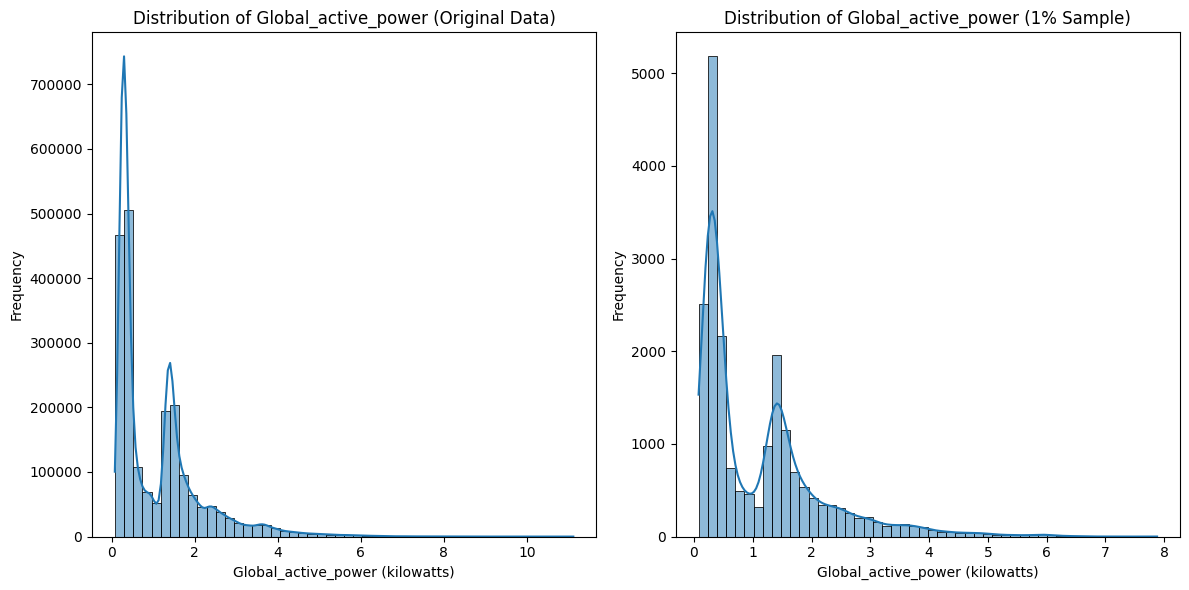

In [ ]:
# Create a 1% random sample of the data
df_sample = df.sample(frac=0.01, random_state=42)

# Plot histograms to compare distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global_active_power (Original Data)')
plt.xlabel('Global_active_power (kilowatts)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df_sample['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global_active_power (1% Sample)')
plt.xlabel('Global_active_power (kilowatts)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Ex. 17: Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.[texto do link](https://)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns to scale (excluding Date, Time, Day of Week, Day_of_week, Day_type, Month)
numerical_cols = ['Global_active_power', 'Global_reactive_power',
                  'Voltage', 'Global_intensity',
                  'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("DataFrame after Min-Max Scaling:")
display(df.head())

DataFrame after Min-Max Scaling:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day of Week,Day_of_week,Day_type,Month,Total_Sub_metering
0,2006-12-16,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,Saturday,5,finais de semana,2006-12,0.134328
1,2006-12-16,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,Saturday,5,finais de semana,2006-12,0.126866
2,2006-12-16,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,Saturday,5,finais de semana,2006-12,0.141791
3,2006-12-16,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,Saturday,5,finais de semana,2006-12,0.134328
4,2006-12-16,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,Saturday,5,finais de semana,2006-12,0.134328


Ex. 18: Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

Mean consumption by cluster:


,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
cluster,,,,
0,131.029659,19.021151,22.183996,291.891758
1,69.899648,8.185079,14.671875,138.451430
2,183.774120,25.333543,32.027795,442.755957


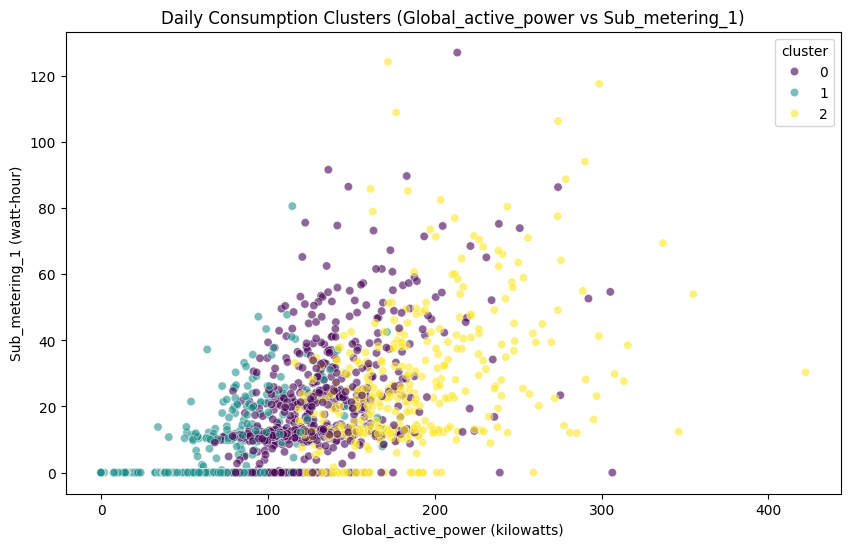

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate consumption data by day.
# We'll use the sum of Global_active_power and the sum of the sub-meterings as features for clustering.
daily_consumption = df.groupby('Date')[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum().dropna()

# Select features for clustering
X = daily_consumption[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # n_init='auto' is also a good option in newer sklearn versions
daily_consumption['cluster'] = kmeans.fit_predict(X)

# Interpret the results by examining the mean consumption for each cluster
cluster_interpretation = daily_consumption.groupby('cluster')[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

print("Mean consumption by cluster:")
display(cluster_interpretation)

# Optional: Visualize the clusters (e.g., using a scatter plot of two features)
# Here we'll plot Global_active_power vs Sub_metering_1 as an example
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Global_active_power', y='Sub_metering_1', hue='cluster', data=daily_consumption, palette='viridis', alpha=0.6)
plt.title('Daily Consumption Clusters (Global_active_power vs Sub_metering_1)')
plt.xlabel('Global_active_power (kilowatts)')
plt.ylabel('Sub_metering_1 (watt-hour)')
plt.show()

Ex. 19: Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

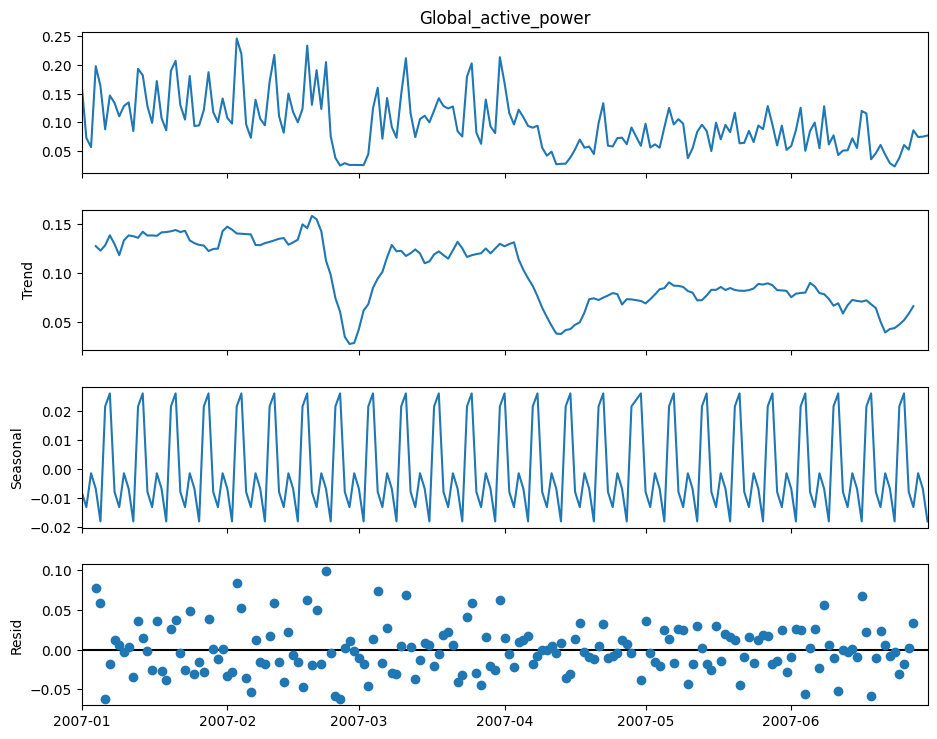

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the DataFrame is sorted by Date and Time for time series analysis
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('datetime').sort_index()

# Resample the data to a lower frequency (e.g., daily) for decomposition
# Using mean to aggregate the 'Global_active_power' for each day
daily_data = df['Global_active_power'].resample('D').mean().dropna()

# Select a 6-month period for decomposition
# Adjust the start and end dates as needed based on your data's time range
start_date = '2007-01-01'
end_date = '2007-06-30'
six_month_period = daily_data[start_date:end_date]

# Perform seasonal decomposition
# The model can be 'additive' or 'multiplicative'
# The period should be set based on the seasonality of your data (e.g., 7 for daily data with weekly seasonality)
# If you expect yearly seasonality with daily data, the period would be 365 (or 365.25)
# For simplicity, let's assume a weekly seasonality for daily data in this example (period=7)
decomposition = seasonal_decompose(six_month_period, model='additive', period=7)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

Ex. 20: Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.

Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


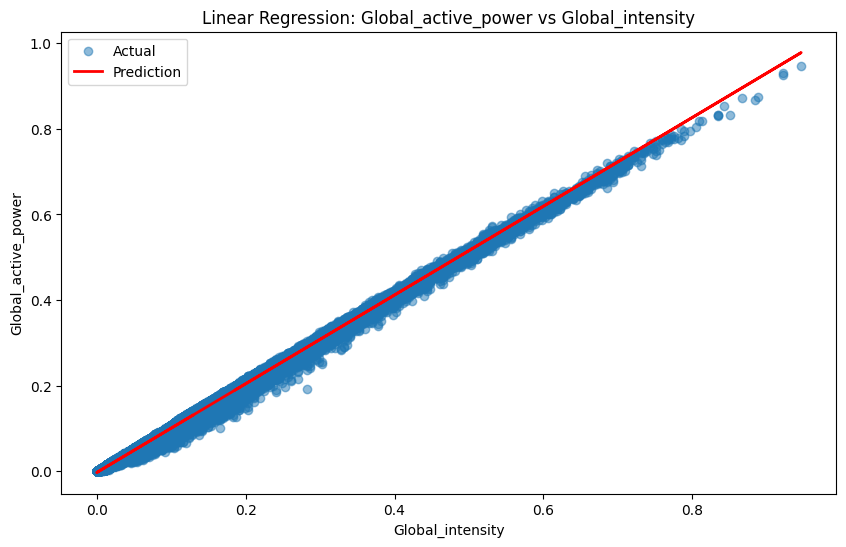

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data - drop rows with missing values in the relevant columns
df_regression = df[['Global_active_power', 'Global_intensity']].dropna()

# Define features (X) and target (y)
X = df_regression[['Global_intensity']]
y = df_regression['Global_active_power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optional: Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.title('Linear Regression: Global_active_power vs Global_intensity')
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()

**PARTE 2 – Exercícios adicionais no dataset inicial**

**PARTE 3 – Novo dataset Appliances Energy Prediction**

**PARTE 4 – Exercícios no Orange Data Mining**

> **Observação:** Os exercícios 36 a 40 foram realizados no Orange Data Mining.  
> O arquivo nomeado como "Orange_Data_Mining_Ex36-40" com esses exercícios está disponível no repositório do Github.
link: https://github.com/LucasWerppFranco/CP-1---Energias-Renovaveis

Ex. 36 a 40:

In [6]:
from IPython.display import Image, display
display(Image(url='https://raw.githubusercontent.com/LucasWerppFranco/CP-1---Energias-Renovaveis/main/Ex36-40.png'))